In [50]:
import pandas as pd
from datetime import datetime
import ipywidgets as widgets

In [51]:
doctors = pd.read_csv('doctors.csv')
clients = pd.read_csv('clients.csv', parse_dates=['client_birth_date'], date_format='%Y-%m-%d')
operations = pd.read_csv('operations.csv')

records_1 = pd.read_csv('records_1.csv', parse_dates=['record_date'], date_format='%Y-%m-%d')
records_2 = pd.read_csv('records_2.csv', parse_dates=['record_date'], date_format='%Y-%m-%d')
records = pd.concat([records_1, records_2])

data = records.merge(doctors).merge(clients).merge(operations)
data

,record_date,client_id,doctor_id,operation_id,number_of_operations,doctor_surname,client_surname,client_birth_date,operation_title,operation_price
0,2024-11-03,7,2,4,1,Johnson,Miller,2019-07-08,operation4,400
1,2024-03-11,9,2,4,1,Johnson,Moore,2018-09-03,operation4,400
2,2024-12-14,9,5,4,1,Brown,Moore,2018-09-03,operation4,400
3,2024-05-08,9,5,4,1,Brown,Moore,2018-09-03,operation4,400
4,2024-09-03,9,4,4,1,Jones,Moore,2018-09-03,operation4,400
...,...,...,...,...,...,...,...,...,...,...
95,2024-09-13,8,5,5,1,Brown,Wilson,2017-12-21,operation5,500
96,2024-06-12,3,1,5,1,Smith,Williams,1955-11-03,operation5,500
97,2024-02-06,2,3,5,1,Williams,Johnson,1948-08-25,operation5,500
98,2024-05-30,2,5,5,1,Brown,Johnson,1948-08-25,operation5,500


In [52]:
# Categorise ages
def age_categorizer(birth_date):
    date_delta_days = (pd.to_datetime(datetime.now()) - birth_date).days

    if date_delta_days >= 60 * 365:
        return 'Retired'
    elif 16 * 365 <= date_delta_days < 60 * 365:
        return 'Adult'
    else:
        return 'Child'

data['client_age_group'] = data['client_birth_date'].apply(age_categorizer)

data

,record_date,client_id,doctor_id,operation_id,number_of_operations,doctor_surname,client_surname,client_birth_date,operation_title,operation_price,client_age_group
0,2024-11-03,7,2,4,1,Johnson,Miller,2019-07-08,operation4,400,Child
1,2024-03-11,9,2,4,1,Johnson,Moore,2018-09-03,operation4,400,Child
2,2024-12-14,9,5,4,1,Brown,Moore,2018-09-03,operation4,400,Child
3,2024-05-08,9,5,4,1,Brown,Moore,2018-09-03,operation4,400,Child
4,2024-09-03,9,4,4,1,Jones,Moore,2018-09-03,operation4,400,Child
...,...,...,...,...,...,...,...,...,...,...,...
95,2024-09-13,8,5,5,1,Brown,Wilson,2017-12-21,operation5,500,Child
96,2024-06-12,3,1,5,1,Smith,Williams,1955-11-03,operation5,500,Retired
97,2024-02-06,2,3,5,1,Williams,Johnson,1948-08-25,operation5,500,Retired
98,2024-05-30,2,5,5,1,Brown,Johnson,1948-08-25,operation5,500,Retired


In [53]:
operations_revenue = data.groupby(['operation_id', 'operation_title', 'operation_price']).apply(lambda df_group: pd.Series({
    'total_revenue': df_group['operation_price'].mean() * df_group['number_of_operations'].sum()
})).reset_index()

operations_revenue

,operation_id,operation_title,operation_price,total_revenue
0,1,operation1,100,1500.0
1,2,operation2,200,3600.0
2,3,operation3,300,5700.0
3,4,operation4,400,10400.0
4,5,operation5,500,11000.0


<Axes: xlabel='Operation', ylabel='Revenue'>

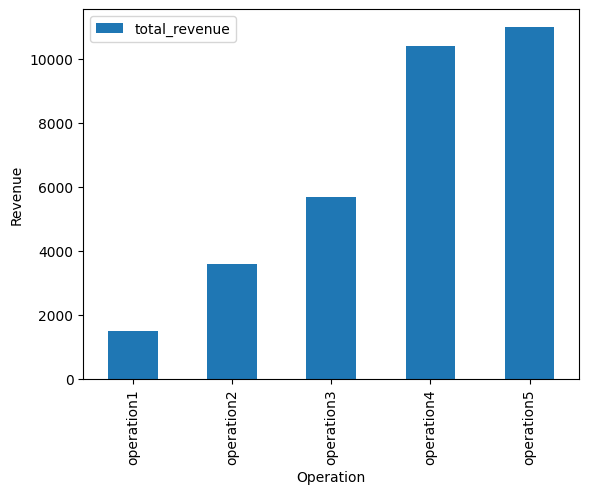

In [54]:
operations_revenue.plot(kind='bar', xlabel='Operation', ylabel='Revenue', x='operation_title', y='total_revenue')

In [55]:
def filter_by_age_group(age_group):
    return data[data.client_age_group == age_group]


widgets.interact_manual(filter_by_age_group, age_group=widgets.Dropdown(options=['Child', 'Adult', 'Retired']))

interactive(children=(Dropdown(description='age_group', options=('Child', 'Adult', 'Retired'), value='Child'),…

<function __main__.filter_by_age_group(age_group)>

In [56]:
doctor_top_operations = data.groupby(['doctor_id', 'doctor_surname', 'operation_id', 'operation_title']).agg(operation_occurences=('operation_id', 'count')).sort_values(['doctor_id', 'operation_occurences'], ascending=False)
doctor_top_operations

operation_occurences
doctor_id doctor_surname operation_id operation_title                      
5         Brown          3            operation3                          8
                         4            operation4                          4
                         5            operation5                          4
                         2            operation2                          2
4         Jones          4            operation4                          3
                         5            operation5                          3
                         3            operation3                          2
                         1            operation1                          1
                         2            operation2                          1
3         Williams       2            operation2                          7
                         4            operation4                          5
                         5            operation5                          5
                         1            operation1                          3
                         3            operation3                          3
2         Johnson        4            operation4                          6
                         5            operation5                          6
                         1            operation1                          5
                         2            operation2                          4
                         3            operation3                          4
1         Smith          4            operation4                          8
                         1            operation1                          6
                         2            operation2                          4
                         5            operation5                          4
                         3            operation3                          2